In [2]:
knitr::opts_chunk$set(echo = TRUE)

In [6]:
library("tidyverse")
heroes <- read_csv("https://raw.githubusercontent.com/Pozdniakov/tidy_stats/master/data/heroes_information.csv",
                   na = c("-", "-99"))
powers <- read_csv("https://raw.githubusercontent.com/Pozdniakov/tidy_stats/master/data/super_hero_powers.csv")
str(heroes)

New names:
• `` -> `...1`
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 734 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): name, Gender, Eye color, Race, Hair color, Publisher, Skin color, A...
dbl (3): ...1, Height, Weight

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 667 Columns: 168
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (1): hero_names
lgl (167): Agility, Accelerated Healing, Lantern Power Ring, Dimensional Awa...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


spc_tbl_ [734 × 11] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ...1      : num [1:734] 0 1 2 3 4 5 6 7 8 9 ...
 $ name      : chr [1:734] "A-Bomb" "Abe Sapien" "Abin Sur" "Abomination" ...
 $ Gender    : chr [1:734] "Male" "Male" "Male" "Male" ...
 $ Eye color : chr [1:734] "yellow" "blue" "blue" "green" ...
 $ Race      : chr [1:734] "Human" "Icthyo Sapien" "Ungaran" "Human / Radiation" ...
 $ Hair color: chr [1:734] "No Hair" "No Hair" "No Hair" "No Hair" ...
 $ Height    : num [1:734] 203 191 185 203 NA 193 NA 185 173 178 ...
 $ Publisher : chr [1:734] "Marvel Comics" "Dark Horse Comics" "DC Comics" "Marvel Comics" ...
 $ Skin color: chr [1:734] NA "blue" "red" NA ...
 $ Alignment : chr [1:734] "good" "good" "good" "bad" ...
 $ Weight    : num [1:734] 441 65 90 441 NA 122 NA 88 61 81 ...
 - attr(*, "spec")=
  .. cols(
  ..   ...1 = col_double(),
  ..   name = col_character(),
  ..   Gender = col_character(),
  ..   `Eye color` = col_character(),
  ..   Race = col_character(),
  ..  

## Unique values
С помощью функции distinct() выведите уникальные значения по колонке Eye color.

In [5]:
distinct(heroes, `Eye color`)

Eye color
<chr>
yellow
blue
green
brown
NA
red
violet
white
purple


## Summarize

В датасете `heroes` посчитайте средний рост по полу.

In [13]:
heroes %>%
  filter(!is.na(Gender)) %>%
  group_by(Gender) %>%
  summarize(mean_height = mean(Height, na.rm = T))

Gender,mean_height
<chr>,<dbl>
Female,174.6840
Male,191.9749


In [15]:
# без исключения NA из Gender
heroes %>%
  group_by(Gender) %>%
  summarize(mean_height = mean(Height, na.rm = T))

Gender,mean_height
<chr>,<dbl>
Female,174.6840
Male,191.9749
NA,177.0667


## Join

Создайте тиббл web_creators, в котором будут супергерои, которые могут плести паутину, т.е. у них стоит TRUE в колонке Web Creation в тиббле powers.

In [26]:
web_creators <- powers %>%
  filter(`Web Creation` == T)
head(web_creators)

hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,⋯,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
Anti-Venom,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,⋯,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
Arachne,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,⋯,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
Carnage,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,⋯,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
Hellgramite,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,⋯,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
Hybrid,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE,⋯,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
Mysterio,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


Найдите всех супергероев, которые присутствуют в heroes, но отсутствуют в powers. Ответом должен быть строковый вектор с именами супергероев.

In [44]:
# переименуем колонку в powers
names(powers)[names(powers) == "hero_names"] <- "name"

names <- heroes %>%
  left_join(powers, by = c("name" = "name")) %>%
  select(name)

names <- names$name
names

[1] "A-Bomb"                    "Abe Sapien"               
  [3] "Abin Sur"                  "Abomination"              
  [5] "Abraxas"                   "Absorbing Man"            
  [7] "Adam Monroe"               "Adam Strange"             
  [9] "Agent 13"                  "Agent Bob"                
 [11] "Agent Zero"                "Air-Walker"               
 [13] "Ajax"                      "Alan Scott"               
 [15] "Alex Mercer"               "Alex Woolsly"             
 [17] "Alfred Pennyworth"         "Alien"                    
 [19] "Allan Quatermain"          "Amazo"                    
 [21] "Ammo"                      "Ando Masahashi"           
 [23] "Angel"                     "Angel"                    
 [25] "Angel Dust"                "Angel Salvadore"          
 [27] "Angela"                    "Animal Man"               
 [29] "Annihilus"                 "Ant-Man"                  
 [31] "Ant-Man II"                "Anti-Monitor"             
 [33] "Anti-Spawn"                "Anti-Venom"               
 [35] "Apocalypse"                "Aquababy"                 
 [37] "Aqualad"                   "Aquaman"                  
 [39] "Arachne"                   "Archangel"                
 [41] "Arclight"                  "Ardina"                   
 [43] "Ares"                      "Ariel"                    
 [45] "Armor"                     "Arsenal"                  
 [47] "Astro Boy"                 "Atlas"                    
 [49] "Atlas"                     "Atom"                     
 [51] "Atom"                      "Atom Girl"                
 [53] "Atom II"                   "Atom III"                 
 [55] "Atom IV"                   "Aurora"                   
 [57] "Azazel"                    "Azrael"                   
 [59] "Aztar"                     "Bane"                     
 [61] "Banshee"                   "Bantam"                   
 [63] "Batgirl"                   "Batgirl"                  
 [65] "Batgirl III"               "Batgirl IV"               
 [67] "Batgirl V"                 "Batgirl VI"               
 [69] "Batman"                    "Batman"                   
 [71] "Batman II"                 "Battlestar"               
 [73] "Batwoman V"                "Beak"                     
 [75] "Beast"                     "Beast Boy"                
 [77] "Beetle"                    "Ben 10"                   
 [79] "Beta Ray Bill"             "Beyonder"                 
 [81] "Big Barda"                 "Big Daddy"                
 [83] "Big Man"                   "Bill Harken"              
 [85] "Billy Kincaid"             "Binary"                   
 [87] "Bionic Woman"              "Bird-Brain"               
 [89] "Bird-Man"                  "Bird-Man II"              
 [91] "Birdman"                   "Bishop"                   
 [93] "Bizarro"                   "Black Abbott"             
 [95] "Black Adam"                "Black Bolt"               
 [97] "Black Canary"              "Black Canary"             
 [99] "Black Cat"                 "Black Flash"              
[101] "Black Goliath"             "Black Knight III"         
[103] "Black Lightning"           "Black Mamba"              
[105] "Black Manta"               "Black Panther"            
[107] "Black Widow"               "Black Widow II"           
[109] "Blackout"                  "Blackwing"                
[111] "Blackwulf"                 "Blade"                    
[113] "Blaquesmith"               "Bling!"                   
[115] "Blink"                     "Blizzard"                 
[117] "Blizzard"                  "Blizzard II"              
[119] "Blob"                      "Bloodaxe"                 
[121] "Bloodhawk"                 "Bloodwraith"              
[123] "Blue Beetle"               "Blue Beetle"              
[125] "Blue Beetle II"            "Blue Beetle III"          
[127] "Boba Fett"                 "Bolt"                     
[129] "Bomb Queen"                

## Visualizations  

Создайте диаграмму рассеяния для датасета heroes, для которой координаты по оси x будут взяты из колонки Height, а координаты по оси y — из колонки Weight.

Предварительно удалите с графика (=из датафрейма) все экстремальные значения, для которых Weight больше или равен 700 или Height больше или равен 400.

Раскрасьте точки в зависимости от Gender, сделайте их полупрозрачными (параметр alpha = 0.6).

Разделите график (с помощью facet_wrap()) на три: для "DC Comics","Marvel Comics" и всех остальных.

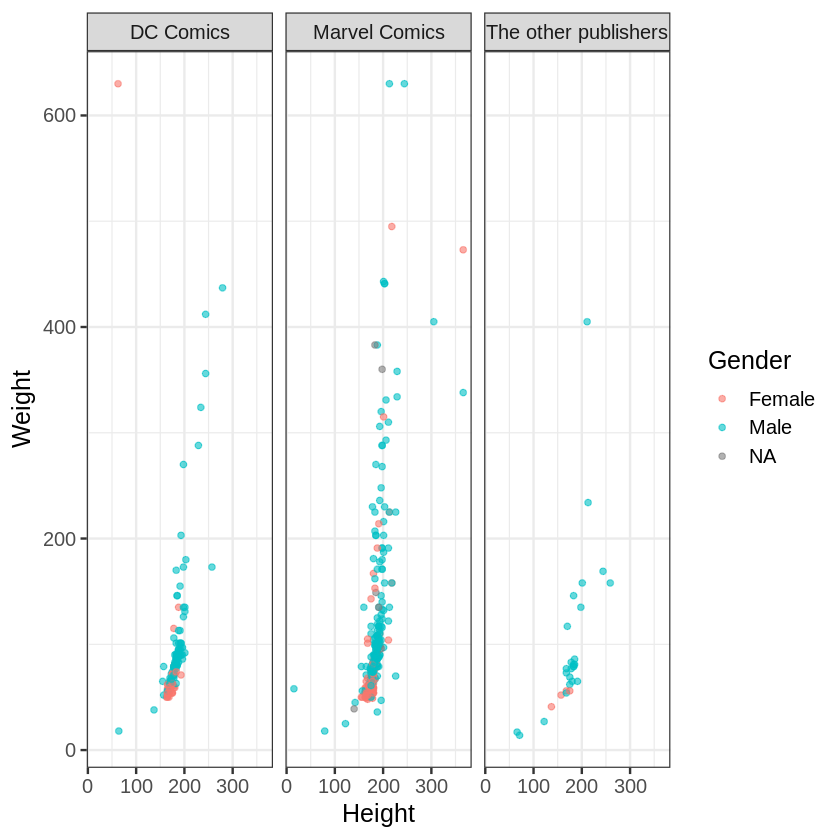

In [63]:
heroes_filtered <- heroes %>%
  filter(Weight <= 700, Height <= 400) %>%
  mutate(Publisher_group = if_else(Publisher %in% c("DC Comics", "Marvel Comics"),
                              as.character(Publisher), "The other publishers")) %>%
  select(Height, Weight, Gender, Publisher_group)

heroes_filtered %>%
  ggplot(aes(x=Height, y=Weight, color=Gender)) +
  geom_point(alpha=0.6) +
  facet_wrap(~ Publisher_group) +
  theme_bw(base_size=15)